In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np
import pickle

In [12]:
allDmc=pd.read_csv("ALLDMC.csv",names = ["dmc_name","unresolved", "resolved"])

In [13]:
allDmc["time_lapse"] = allDmc.resolved - allDmc.unresolved

In [14]:
dmc_names=[name for name,df in allDmc.groupby('dmc_name')]
mean_time=[mean for mean in allDmc.groupby('dmc_name').agg({"time_lapse":"mean"}).sort_values(["dmc_name"],ascending=True).values]

In [15]:
mean_time

[array([22.55418381]),
 array([23.07270233]),
 array([24.04526749]),
 array([24.87654321]),
 array([26.34705075]),
 array([26.01646091])]

In [16]:
dmc_names

[1, 2, 3, 4, 5, 6]

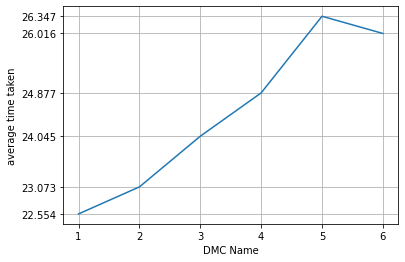

In [17]:
plt.plot(dmc_names,mean_time)

plt.yticks(mean_time)
plt.grid()
plt.xlabel("DMC Name")
plt.ylabel("average time taken")
plt.show()

In [18]:
#allDmc = pd.get_dummies(allDmc[["dmc_name"]])
#allDmc = pd.get_dummies(allDmc)
#x = allDmc[['dmc_name_Central','dmc_name_East','dmc_name_Korangi','dmc_name_Malir','dmc_name_South','dmc_name_West','unresolved']].values

In [19]:
x = allDmc[['dmc_name','unresolved']].values
y = allDmc['resolved'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
model = LinearRegression()  
model.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.coef_

array([0.76865612, 1.00398064])

In [23]:
model.intercept_

-151.18858439349424

In [24]:
pickle.dump(model, open("G:\ODtutorial\FlaskAPIForServerSidePrediction\PredictModel.sav", 'wb'))

In [25]:
y_pred = model.predict(X_test)

In [28]:
prediction = model.predict([[1,43120]])

In [29]:
prediction[0]

43141.22517249563